<a href="https://colab.research.google.com/github/Su-creator-spec/Text-To-Image-generator-/blob/main/Text_Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.2 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline  # Import the DiffusionPipeline class from the diffusers library
import torch  # Import the torch library for tensor operations

# Initialize the base pipeline
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",  # Specify the model checkpoint to load for the base pipeline
    torch_dtype=torch.float16,  # Set the data type for tensors to float16, which is half-precision floating point
    use_safetensors=True,  # Enable safe tensors, which is typically used for numerical stability (Safe tensors are designed to improve numerical stability during model operations. By using safe tensors, the model can potentially reduce the risk of numerical errors and improve the overall robustness of the computations.)
    variant="fp16"  # Specify the variant as fp16, indicating the model is optimized for float16 operations (The variant parameter is set to "fp16", indicating that the model is optimized for operations using float16 precision. Float16, also known as half-precision, reduces the memory footprint and computational load compared to full precision (float32). This variant is particularly useful for leveraging hardware accelerators like GPUs that perform well with half-precision arithmetic, leading to faster computation and reduced memory usage.)
)

pipe.to("cuda")  # Move the pipeline to GPU (CUDA) for faster computation if CUDA is available

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# sample text input
prompt=" A vibrant sunset over the city skyline with silhouted buidings."

In [ ]:
negative_prompt="Avoid including any water elements in the scene."

In [ ]:
images=pipe(prompt=prompt,negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

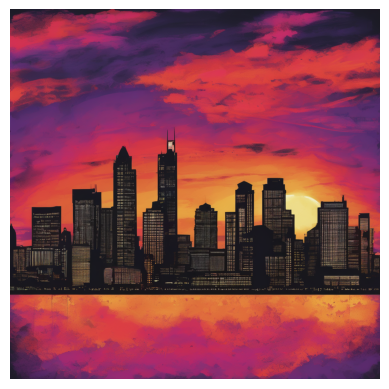

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images)
plt.axis('off')
plt.show()

Proper App

  0%|          | 0/50 [00:00<?, ?it/s]

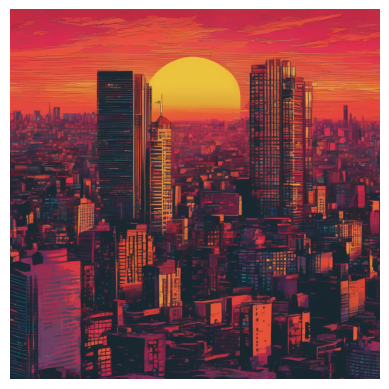

In [ ]:
def generate_image(prompt, negative_prompt):
    # Generate image using the base pipeline
    images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

    # Display the image using matplotlib
    plt.imshow(images)
    plt.axis('off')
    plt.show()

# Example usage
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."
negative_prompt = "Avoid including any water elements in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

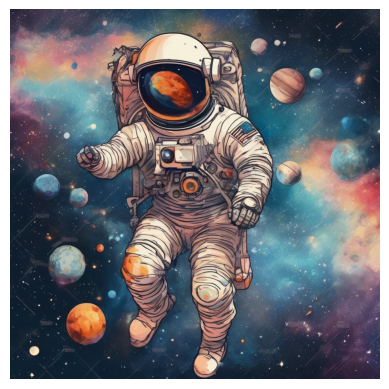

In [ ]:
# example usage
prompt = "A spaceman floating in the galaxy with stars and planets around."
negative_prompt = "Avoid including any alien creatures in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

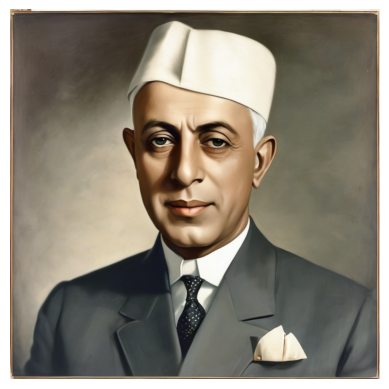

In [ ]:
# Example usage
prompt = "A portrait of the first Prime Minister of India, jawaharlal nehru, in a formal suit."
negative_prompt = "Avoid including any other people in the scene."
generate_image(prompt, negative_prompt)